In [1]:
import pandas as pd
import numpy as np

D:\annaconda\envs\pytorch1\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\annaconda\envs\pytorch1\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
D:\annaconda\envs\pytorch1\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
df = pd.read_csv('zhuhaihouse_chuli_34.csv')

In [3]:
df.info

<bound method DataFrame.info of             街区 租赁方式    朝向  每月租金  行政区  板块     房屋面积      格局  楼层 电梯  ... 朝向编码二元化  \
0    荔枝湾花园（南区）   整租  东/东南  4500  横琴区  横琴   70.68㎡  4室2厅2卫  11  有  ...     0.0   
1           龙光   整租   南/北  8000  横琴区  横琴  102.00㎡  3室1厅2卫  21  有  ...     0.0   
2    荔枝湾花园（北区）   整租     南  5800  横琴区  横琴   85.00㎡  4室2厅2卫  29  有  ...     1.0   
3         华发悦府   整租     南  4800  横琴区  横琴   79.00㎡  2室1厅1卫  31  有  ...     1.0   
4        方达成大厦   整租    西南  5500  横琴区  横琴   89.00㎡  2室2厅1卫  56  无  ...     0.0   
..         ...  ...   ...   ...  ...  ..      ...     ...  .. ..  ...     ...   
697     横琴总部大厦   整租     东  7000  横琴区  横琴   91.92㎡  1室1厅1卫  33  有  ...     0.0   
698      华融琴海湾   整租     南  5500  横琴区  横琴   81.00㎡  2室2厅1卫  24  有  ...     1.0   
699     保利国际广场   整租     南  6300  横琴区  横琴  125.87㎡  1室1厅0卫  22  有  ...     1.0   
700  荔枝湾花园（北区）   整租     南  5000  横琴区  横琴   86.00㎡  4室2厅3卫  28  有  ...     1.0   
701         龙光   整租   南/北  7500  横琴区  横琴  104.00㎡  3室2厅2卫  15  无  ...     0.0

In [4]:
df.describe()
#观看数据分布，最大值，最小值，均值

,每月租金,楼层,街区目标编码,街区目标编码_m5,朝向编码,朝向编码二元化,房屋面积数值,室,厅,卫,电梯编码,车位编码,用水编码,用电编码,燃气编码
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,5385.769231,29.710826,5396.984362,5415.659833,8.165242,0.801994,95.345783,2.636752,1.757835,1.461538,0.900285,0.414530,1.566952,1.572650,1.712251
std,1126.605961,9.239120,712.261693,624.130940,3.003287,0.398781,20.295254,0.797975,0.478991,0.634776,0.299833,0.658936,0.630143,0.629511,0.679719
min,4000.000000,7.000000,4314.294872,4525.132626,0.000000,0.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4500.000000,26.000000,4962.474168,4986.321777,5.000000,1.000000,83.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
50%,5000.000000,30.000000,5445.536859,5440.939349,9.000000,1.000000,90.000000,3.000000,2.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000
75%,6287.500000,32.000000,5897.143590,5871.251217,9.000000,1.000000,106.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,8000.000000,56.000000,7061.923077,6832.751479,18.000000,1.000000,174.000000,4.000000,2.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
import matplotlib.pyplot as plt

1.位置分析
通过 Pandas的 groupby()方法将 df对象按照“区域”一列进行分组，并利用count()方法统计每个分组的数量，具体代码如下。

In [6]:
#创建一个DataFrame对象，该对象只有两列数据：区域和数量
new_df = pd.DataFrame({'街区':df['街区'].unique(),'数量':[0]*32})
# 按“区域”列将file_data进行分组，并统计每个分组的数量
groupy_area = df.groupby(by='街区').count()
new_df['数量'] = groupy_area.values
new_df

,街区,数量
0,荔枝湾花园（南区）,13
1,龙光,32
2,荔枝湾花园（北区）,5
3,华发悦府,4
4,方达成大厦,9
5,铁建大厦,51
6,三一南方总部大厦,13
7,中交汇通横琴广场,22
8,中海名钻花园,29
9,华发首府花园一期,47


通过 sort_values()方法对new_df对象排序，按照从大到小的顺序进行排列，具体代码如下。

In [7]:
# 按“数量”一列从大到小排列

new_df.sort_values(by=['数量'], ascending=False)

,街区,数量
13,横琴金融传媒中心,74
27,珠江国际金融中心,72
28,紫檀文化中心,66
31,红旗村东江花园,60
5,铁建大厦,51
9,华发首府花园一期,47
12,华发广场悦琴湾,47
18,华发广场悦海湾,39
1,龙光,32
8,中海名钻花园,29


通过输出的排序结果可以看出，房源数量位于前的区域分别是横琴金融传媒中心、珠江国际金融中心、紫檀文化中心。

2.户型数量分析
随着人们生活水平的提高，以及各住户的生活需求，开发商设计出了各种各样的户型供人们居住。接下来，我们来分析一下户型，统计租房市场中哪种户型的房源数量偏多，并筛选出数量大于50的户型。

首先，我们定义一个函数来计算各种户型的数量，具体代码如下。


In [8]:
# 定义函数，用于计算各户型的数量
def all_house(arr):
    key = np.unique(arr)
    result = {}
    for k in key:
        mask = (arr == k)
        arr_new = arr[mask]
        v = arr_new.size
        result[k] = v
    return result

# 获取户型数据
house_array = df['格局']
house_info = all_house(house_array)
house_info

{'1室0厅0卫': 11,
 '1室0厅1卫': 5,
 '1室1厅0卫': 8,
 '1室1厅1卫': 53,
 '1室2厅0卫': 1,
 '1室2厅1卫': 1,
 '2室1厅1卫': 56,
 '2室1厅2卫': 1,
 '2室2厅1卫': 101,
 '2室2厅2卫': 2,
 '3室1厅1卫': 15,
 '3室1厅2卫': 5,
 '3室2厅1卫': 138,
 '3室2厅2卫': 240,
 '3室2厅3卫': 2,
 '4室2厅1卫': 3,
 '4室2厅2卫': 28,
 '4室2厅3卫': 32}

程序输出了一个字典，其中，字典的键表示户型的种类，值表示该户型的数量。

使用字典推导式将户型数量大于50的元素筛选出来，并将筛选后的结果转换成 DataFrame对象，具体代码如下。

In [9]:
# 使用字典推导式
house_type = dict((key, value) for key, value 
in house_info.items() if value > 50)
show_houses = pd.DataFrame({'格局':[x for x in  house_type.keys()],
                  '数量':[x for x in house_type.values()]})
show_houses

,格局,数量
0,1室1厅1卫,53
1,2室1厅1卫,56
2,2室2厅1卫,101
3,3室2厅1卫,138
4,3室2厅2卫,240


为了能够更直观地看到户型数量间的差异，我们可以使用条形图进行展示，其中，条形图纵轴坐标代表户型种类，横坐标代表数量体代码如下

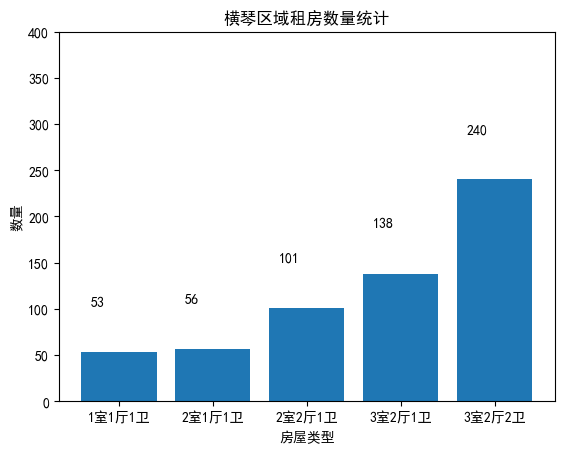

In [10]:
# 图形展示房屋类型

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   
house_type = show_houses["格局"]
house_type_num = show_houses["数量"]
plt.bar(range(5), house_type_num)
plt.xticks(range(5), house_type)
#ylim:设置y轴范围
plt.ylim(0, 400)

plt.title("横琴区域租房数量统计")
plt.xlabel("房屋类型")
plt.ylabel("数量")


# 给每个条上面添加具体数字
#plt.text(x,y,string):设置说明文字(x：x轴位置；y：y轴位置；string：表示说明文字)
for x, y in enumerate(house_type_num):
    # print(x, y)
    plt.text(x-0.3,y+50, "%s" %y)

plt.show()


3 平均租金分析
为了进一步剖析房屋的情况，接下来，我们来分析一下各地区目前的平均租金情况。计算各区域房租的平均价格与计算各区域户型数量的方法大同小异，首先创建一个df对象，具体代码如下。

In [11]:
# 新建一个DataFrame对象，设置房租总金额和总面积初始值为0

df_all = pd.DataFrame({'街区':df['街区'].unique(),
                         '每月总租金':[0]*32,
                         '房屋总面积(㎡)':[0]*32})
df_all

,街区,每月总租金,房屋总面积(㎡)
0,荔枝湾花园（南区）,0,0
1,龙光,0,0
2,荔枝湾花园（北区）,0,0
3,华发悦府,0,0
4,方达成大厦,0,0
5,铁建大厦,0,0
6,三一南方总部大厦,0,0
7,中交汇通横琴广场,0,0
8,中海名钻花园,0,0
9,华发首府花园一期,0,0


接下来，按照“区域”一列进行分组，然后调用sum()方法分别对房租金额和房屋面积执行求和计算，具体代码如下:

In [12]:
# 求总金额和总面积


sum_price = df['每月租金'].groupby(df['街区']).sum()
sum_area = df['房屋面积数值'].groupby(df['街区']).sum()
df_all['每月总租金'] = sum_price.values
df_all['房屋总面积(㎡)'] = sum_area.values
df_all

,街区,每月总租金,房屋总面积(㎡)
0,荔枝湾花园（南区）,58100,953.54
1,龙光,140800,3038.37
2,荔枝湾花园（北区）,20500,275.24
3,华发悦府,26000,451.00
4,方达成大厦,39900,866.37
5,铁建大厦,306500,5800.66
6,三一南方总部大厦,77010,1646.37
7,中交汇通横琴广场,123700,1925.22
8,中海名钻花园,164700,2763.12
9,华发首府花园一期,256000,4414.88


计算出各区域房租总金额和总面积之后，便可以对每平方米的租金进行计算。在df_all对象的基础上增加一列，该列的名称为“每平方米租金(元)”，数据为求得的每平方米的平均价格，具体代码如下。

In [13]:
# 计算各区域每平米房租价格,并保留两位小数

df_all['每平米租金'] = round(df_all['每月总租金'] / df_all ['房屋总面积(㎡)'], 2)
df_all

,街区,每月总租金,房屋总面积(㎡),每平米租金
0,荔枝湾花园（南区）,58100,953.54,60.93
1,龙光,140800,3038.37,46.34
2,荔枝湾花园（北区）,20500,275.24,74.48
3,华发悦府,26000,451.00,57.65
4,方达成大厦,39900,866.37,46.05
5,铁建大厦,306500,5800.66,52.84
6,三一南方总部大厦,77010,1646.37,46.78
7,中交汇通横琴广场,123700,1925.22,64.25
8,中海名钻花园,164700,2763.12,59.61
9,华发首府花园一期,256000,4414.88,57.99


为了能更加全面地了解到各个街区的租房数量与平均租金，我们可以将之前创建的 new_df对象(各区域房源数量)与df_all对象进行合并展示，由于这两个对象中都包含“区域”一列，所以这里可以采用主键的方式进行合并，也就是说通过 merge()函数来实现，具体代码如下。

In [14]:
# 合并new_df与df_all

df_merge = pd.merge(new_df, df_all)
df_merge

,街区,数量,每月总租金,房屋总面积(㎡),每平米租金
0,荔枝湾花园（南区）,13,58100,953.54,60.93
1,龙光,32,140800,3038.37,46.34
2,荔枝湾花园（北区）,5,20500,275.24,74.48
3,华发悦府,4,26000,451.00,57.65
4,方达成大厦,9,39900,866.37,46.05
5,铁建大厦,51,306500,5800.66,52.84
6,三一南方总部大厦,13,77010,1646.37,46.78
7,中交汇通横琴广场,22,123700,1925.22,64.25
8,中海名钻花园,29,164700,2763.12,59.61
9,华发首府花园一期,47,256000,4414.88,57.99


合并完数据以后，就可以借用图表来展示各地区房屋的信息，其中，房源的数量可以用柱状图中的条柱表示，每平方米租金可以用折线图中的点表示，具体代码如下。

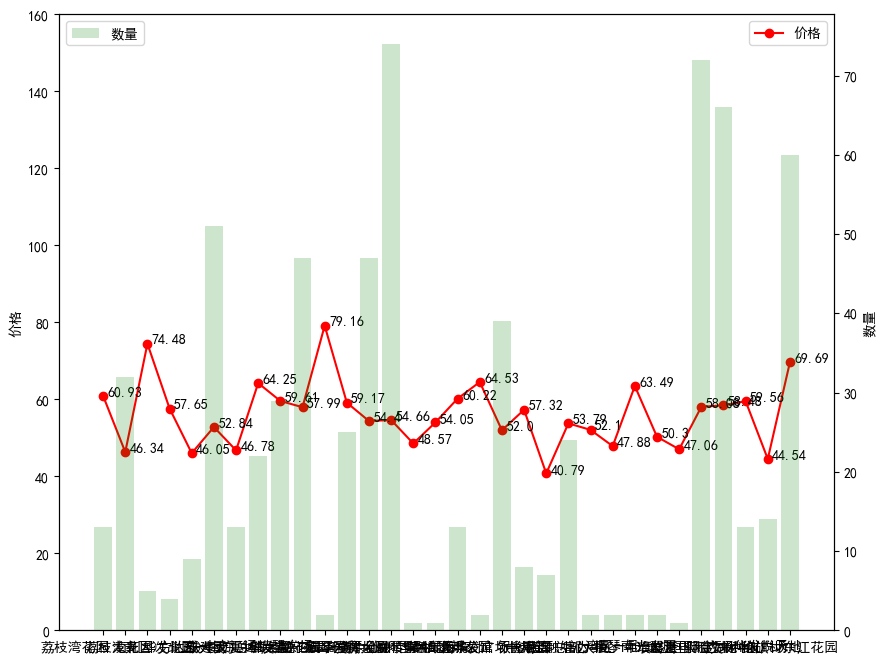

In [15]:
# 图形可视化

num = df_merge["数量"]
price = df_merge["每平米租金"]
x_label = df_merge["街区"]
x = [i for i in range(32)]

fig = plt.figure(figsize=(10, 8), dpi=100)

# 显示折线图
ax1 = fig.add_subplot(111)
#'or-':o代表圆圈marker,r代表红色，-代表实线
ax1.plot(x, price, "or-", label="价格")
for i, (_x, _y) in enumerate(zip(x, price)):
    plt.text(_x+0.2, _y, _y)
ax1.set_ylim([0, 160])   
ax1.set_ylabel("价格")
plt.legend(loc="upper right")

# 显示条形图
#twinx():产生一个镜面坐标
#alpha：透明度
ax2 = ax1.twinx()
plt.bar(x, num, label="数量", alpha=0.2, color="green")
ax2.set_ylabel("数量")
plt.legend(loc="upper left")

plt.xticks(x, x_label,rotation=270)


plt.show()


# 4 面积区间分析

下面我们将房屋的面积数据按照一定的规则划分成多个区间，看一下各面积区间的上情况，便于分析租房市场中哪种房屋类型更好出租，哪个面积区间的相房人数最多

要想将数据划分为若干个区间，则可以使用Pame中的cut()函数来实现，首先，使用max()与min()方法分别计算出房屋面积的最大值和最小值，具体代码如下。

In [16]:
# 查看房屋的最大面积和最小面积
print('房屋最大面积是%d平米'%(df['房屋面积数值'].max()))
print('房屋最小面积是%d平米'%(df['房屋面积数值'].min()))

# 查看房租的最高值和最小值
print('房租最高价格为每月%d元'%(df['每月租金'].max()))
print('房屋最低价格为每月%d元'%(df['每月租金'].min()))


房屋最大面积是174平米
房屋最小面积是38平米
房租最高价格为每月8000元
房屋最低价格为每月4000元


在这里，我们参照链家网站的面积区间来定义，将房屋面积划分为8个区间。然后使用describe()方法显示各个区间出现的次数( counts表示)以及频率(freps表示)，具体代码如下。

In [17]:
# 面积划分
area_divide = [1, 30, 50, 70, 90, 120, 140, 160, 200]
area_cut = pd.cut(list(df['房屋面积数值']), area_divide)
area_cut_data = area_cut.describe()
area_cut_data

,counts,freqs
categories,,
"(1, 30]",0,0.000000
"(30, 50]",4,0.005698
"(50, 70]",37,0.052707
"(70, 90]",340,0.484330
"(90, 120]",224,0.319088
"(120, 140]",84,0.119658
"(140, 160]",7,0.009972
"(160, 200]",6,0.008547


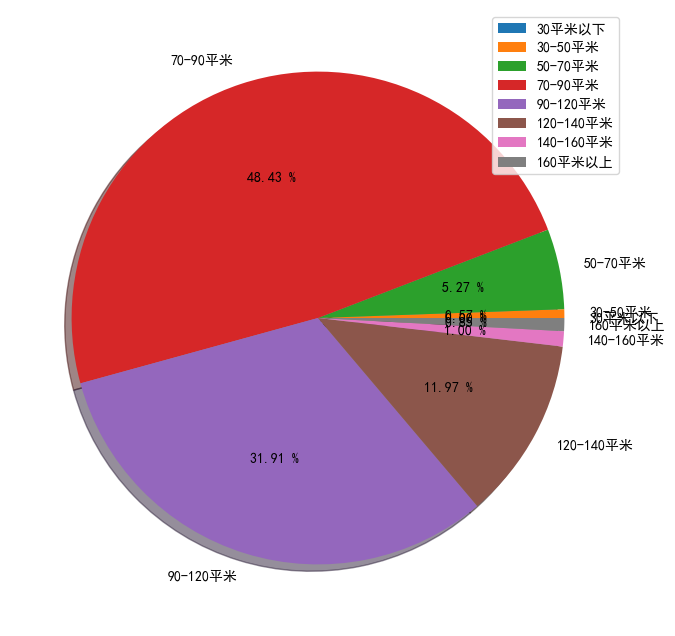

In [18]:
area_percentage = (area_cut_data['freqs'].values)*100

labels  = ['30平米以下', '30-50平米', '50-70平米', '70-90平米',
'90-120平米','120-140平米','140-160平米','160平米以上']

plt.figure(figsize=(20, 8), dpi=100)
plt.axes(aspect=1)  # 显示的是圆形,如果不加,是椭圆形
plt.pie(x=area_percentage, labels=labels, autopct='%.2f %%', shadow=True)
plt.legend(loc='upper right')
plt.show()

面积与租金关系

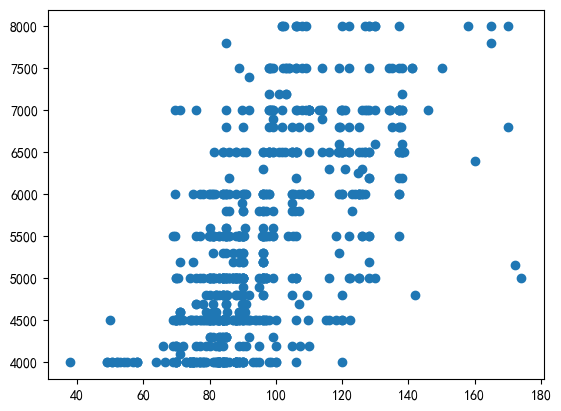

In [19]:
plt.scatter(df['房屋面积数值'], df['每月租金']);

面积与租金的关系不明显，各个价格区间有不同的面积，大致为面积越大租金越贵。

6.层数与价格

In [20]:
#创建一个DataFrame对象，该对象只有两列数据：层数和数量
new2_df = pd.DataFrame({'楼层':df['楼层'].unique(),'数量':[0]*33})
groupy2_area = df.groupby(by='楼层').count()
new2_df['数量'] = groupy2_area.values
# 按“楼层”一列从大到小排列
new2_df.sort_values(by=['楼层'], ascending=False)


,楼层,数量
4,56,4
9,51,17
20,45,57
26,43,5
21,42,59
30,41,31
23,39,5
12,37,10
13,35,20
16,34,65


In [21]:
df2_all = pd.DataFrame({'楼层':df['楼层'].unique(),
                         '房租总金额':[0]*33,
                         '总面积(㎡)':[0]*33})
df2_all.sort_values(by=['楼层'], ascending=False)

,楼层,房租总金额,总面积(㎡)
4,56,0,0
9,51,0,0
20,45,0,0
26,43,0,0
21,42,0,0
30,41,0,0
23,39,0,0
12,37,0,0
13,35,0,0
16,34,0,0


In [22]:
sum_price2 = df['每月租金'].groupby(df['楼层']).sum()
sum_area2 = df['房屋面积数值'].groupby(df['楼层']).sum()
df2_all['房租总金额'] = sum_price2.values
df2_all['总面积(㎡)'] = sum_area2.values
# 计算各区域每平米房租价格,并保留两位小数

df2_all['每平米租金(元)'] = round(df2_all['房租总金额'] / df2_all ['总面积(㎡)'], 2)

In [23]:
df_merge2 = pd.merge(new2_df, df2_all)
df_merge2.sort_values(by=['楼层'], ascending=False)

,楼层,数量,房租总金额,总面积(㎡),每平米租金(元)
4,56,4,25300,379.00,66.75
9,51,17,97700,1847.58,52.88
20,45,57,331700,5501.62,60.29
26,43,5,21200,479.37,44.22
21,42,59,277500,5059.82,54.84
30,41,31,165500,2808.53,58.93
23,39,5,31000,562.12,55.15
12,37,10,47100,798.54,58.98
13,35,20,108600,2098.18,51.76
16,34,65,344300,6556.99,52.51


In [24]:
df_merge2 = pd.merge(new2_df, df2_all)
af=df_merge2.sort_values(by=['楼层'], ascending=False)

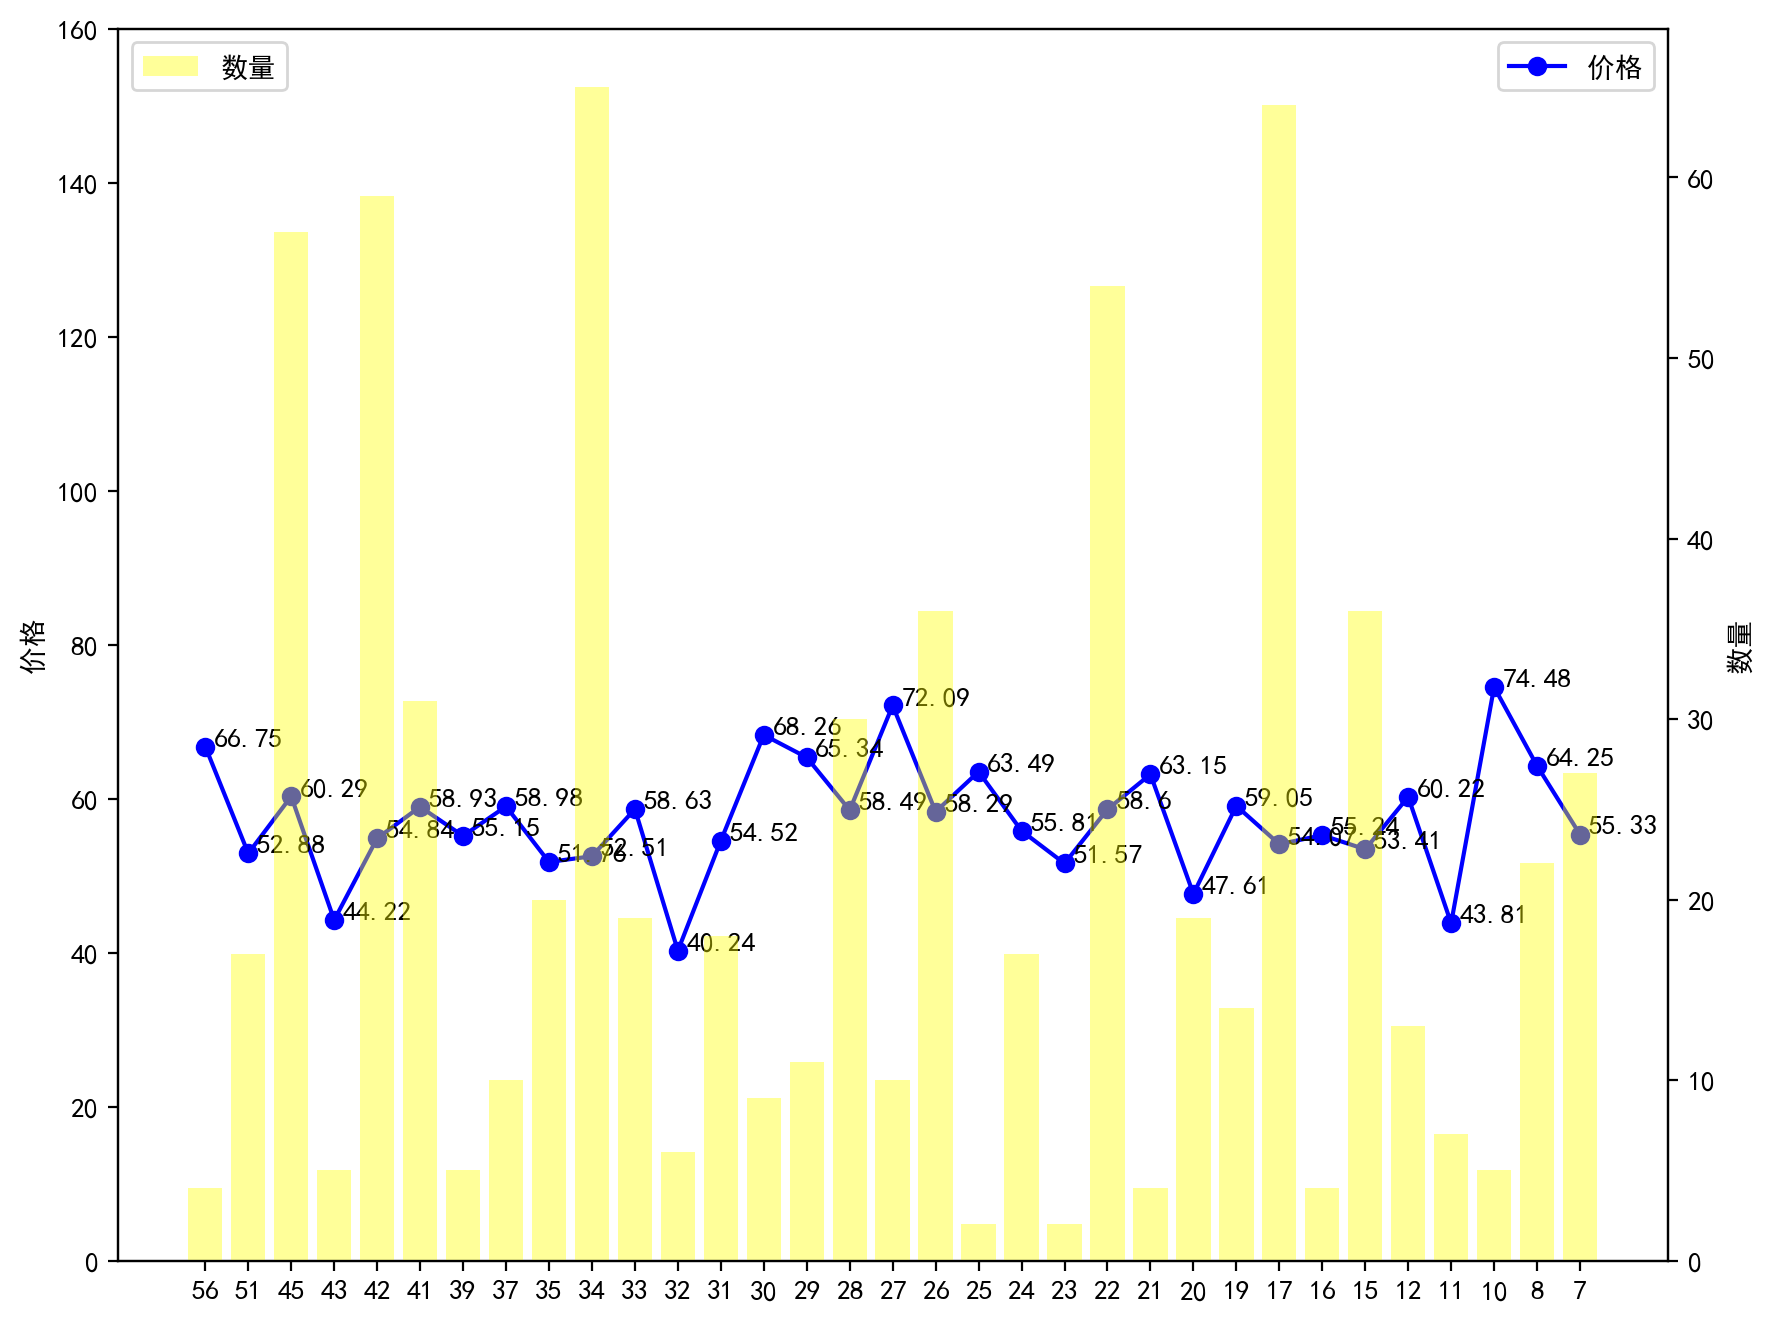

In [25]:
# 图形可视化

num = af["数量"]
price = af["每平米租金(元)"]
x_label = af["楼层"]
x = [i for i in range(33)]

fig = plt.figure(figsize=(10, 8), dpi=200)

# 显示折线图
ax1 = fig.add_subplot(111)
#'or-':o代表圆圈marker,r代表红色，-代表实线
ax1.plot(x, price, "ob-", label="价格")
for i, (_x, _y) in enumerate(zip(x, price)):
    plt.text(_x+0.2, _y, _y)
ax1.set_ylim([0, 160])   
ax1.set_ylabel("价格")
plt.legend(loc="upper right")

# 显示条形图
#twinx():产生一个镜面坐标
#alpha：透明度
ax2 = ax1.twinx()
plt.bar(x, num, label="数量", alpha=0.4, color="yellow")
ax2.set_ylabel("数量")
plt.legend(loc="upper left")
plt.xticks(x, x_label)


plt.show()


高底层的价格没有明显差距

In [26]:
# 查看房屋的最高层和最底层
print('房屋最高层是%d层'%(df['楼层'].max()))
print('房屋最低层是%d层'%(df['楼层'].min()))

# 查看房租的高值和最低值
print('房租最高价格为每月%d元'%(df['每月租金'].max()))
print('房屋最低价格为每月%d元'%(df['每月租金'].min()))


房屋最高层是56层
房屋最低层是7层
房租最高价格为每月8000元
房屋最低价格为每月4000元


将楼层分为底层，中层，高层进行分析

In [27]:
# 楼层划分
area2_divide = [1,15,30,60]
area2_cut = pd.cut(list(df['楼层']), area2_divide)
area2_cut_data = area2_cut.describe()
area2_cut_data



,counts,freqs
categories,,
"(1, 15]",53,0.075499
"(15, 30]",358,0.509972
"(30, 60]",291,0.414530


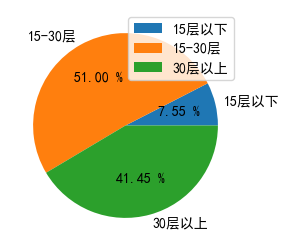

In [28]:
area2_percentage = (area2_cut_data['freqs'].values)*100
labels2 = ['15层以下', '15-30层', '30层以上']

plt.figure(figsize=(20,3), dpi=100)
plt.axes(aspect=1)  # 显示的是圆形,如果不加,是椭圆形
plt.pie(x=area2_percentage, labels=labels2, autopct='%.2f %%', shadow=False)
plt.legend(loc='upper right')
plt.show()

通过图可以看出人们的首选是中高层楼房。

6.分析数据间的相关性

In [33]:
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
d = df.corr()
d

,每月租金,楼层,街区目标编码,街区目标编码_m5,朝向编码,朝向编码二元化,房屋面积数值,室,厅,卫,电梯编码,车位编码,用水编码,用电编码,燃气编码
每月租金,1.000000,-0.116321,0.669382,0.654044,0.010507,-0.019807,0.629082,0.375993,0.209395,0.395960,-0.185800,0.004249,-0.063269,-0.051954,0.146803
楼层,-0.116321,1.000000,-0.139629,-0.164529,-0.036731,-0.118167,-0.169567,-0.114110,-0.058719,-0.126072,0.074544,0.015266,-0.159490,-0.142688,0.018760
街区目标编码,0.669382,-0.139629,1.000000,0.990324,0.018916,0.030730,0.402711,0.188806,0.166666,0.206547,-0.273554,-0.019354,-0.068754,-0.062058,0.212386
街区目标编码_m5,0.654044,-0.164529,0.990324,1.000000,0.017584,0.032196,0.373988,0.175040,0.158776,0.197971,-0.296394,-0.012581,-0.068023,-0.061121,0.206671
朝向编码,0.010507,-0.036731,0.018916,0.017584,1.000000,-0.050064,-0.047887,0.069130,0.018932,0.076670,0.040503,-0.062775,0.091384,0.072113,0.102989
朝向编码二元化,-0.019807,-0.118167,0.030730,0.032196,-0.050064,1.000000,-0.021732,0.042626,0.069747,0.023409,0.013596,-0.067211,0.101084,0.100004,0.089483
房屋面积数值,0.629082,-0.169567,0.402711,0.373988,-0.047887,-0.021732,1.000000,0.375687,0.183761,0.301513,-0.061740,-0.019013,-0.010809,-0.005113,0.034058
室,0.375993,-0.114110,0.188806,0.175040,0.069130,0.042626,0.375687,1.000000,0.676454,0.694748,-0.103907,-0.101181,0.254114,0.255656,0.467159
厅,0.209395,-0.058719,0.166666,0.158776,0.018932,0.069747,0.183761,0.676454,1.000000,0.480723,-0.098848,-0.056632,0.233390,0.242938,0.513001
卫,0.395960,-0.126072,0.206547,0.197971,0.076670,0.023409,0.301513,0.694748,0.480723,1.000000,-0.170083,-0.052207,0.108087,0.112315,0.364447


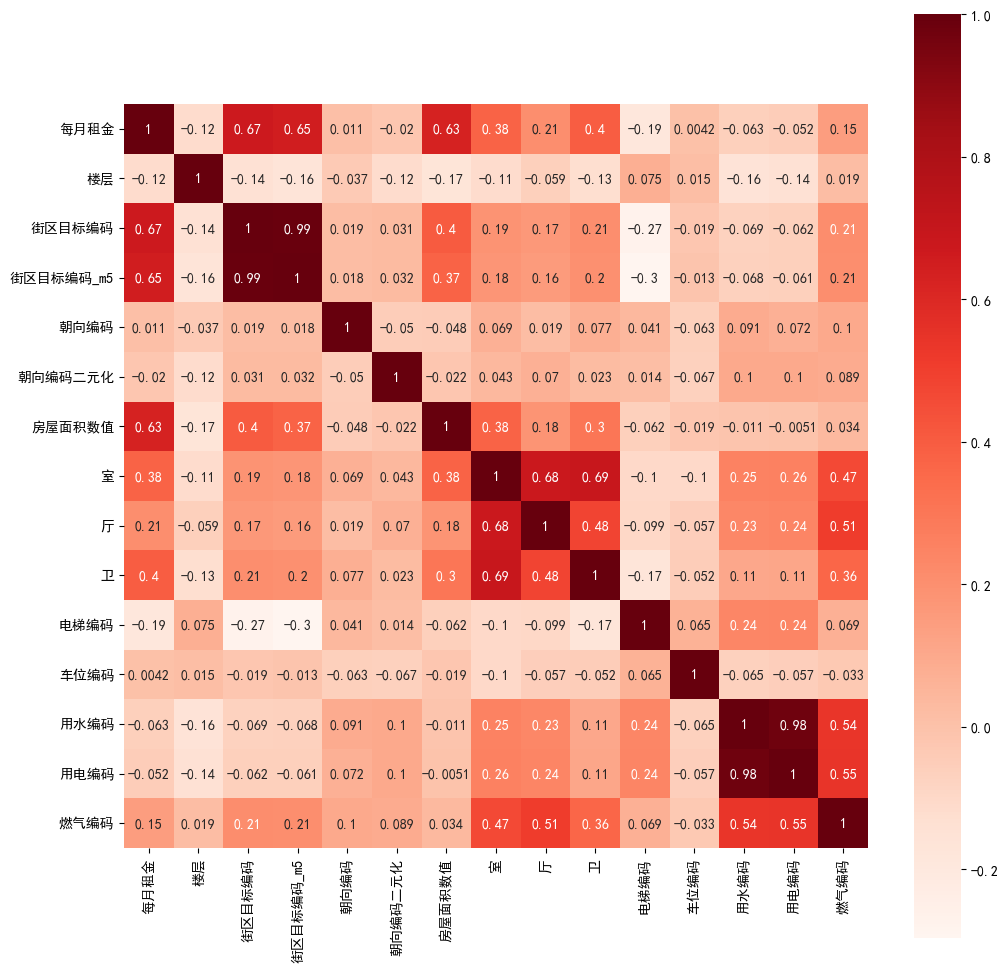

In [34]:
plt.subplots(figsize = (12,12))
sns.heatmap(d,annot = True,vmax = 1,square = True,cmap = "Reds")
plt.show()

可以看到与租金关联度较大的是区位和房屋面积

In [35]:
总结：

SyntaxError: invalid character in identifier (1496511741.py, line 1)